In [1]:
from simulate_game import simulate_game
from competitive_sudoku.sudoku import load_sudoku

import importlib
import sys
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from datetime import datetime

from tqdm import tqdm

In [2]:
# Winner 0 if it was a draw, 1 if player 1 won, 2 if player 2 won
# Reason:
# "regular" if it was played till the end
# "taboo" if a taboo move was played
# "invalid" if invalid move was played
# "illegal" if illegal move was played
# "no move" if no move was supplied


def run_simulation(first_player: str, second_player: str, board_name: str, time: float) -> set:
    player1 = importlib.import_module(first_player + '.sudokuai').SudokuAI()
    player2 = importlib.import_module(second_player + '.sudokuai').SudokuAI()
    player1.player_number = 1
    player2.player_number = 2
    
    # We do not check for specific ai, just give it to all of them
    player1.solve_sudoku_path = 'bin\\solve_sudoku.exe'
    player2.solve_sudoku_path = 'bin\\solve_sudoku.exe'
    
    board = load_sudoku(board_name)
    
    # Note for future, we do not clean up files
    
    old_stdout = sys.stdout
    sys.stdout = buffer = io.StringIO()
    
    simulate_game(board, player1, player2, solve_sudoku_path='bin\\solve_sudoku.exe', calculation_time=time)
    
    sys.stdout = old_stdout
    result = buffer.getvalue()
    
    last_line = result.splitlines()[-1]
    splitted_line = last_line.split(".")
    
    if len(splitted_line) == 2:
        winner = {"The game ends in a draw": 0, "Player 1 wins the game":1, 
                  "Player 2 wins the game":2}[splitted_line[0]]
        reason = "regular"
    
    else:
        winner = {" The game ends in a draw": 0, " Player 1 wins the game":1, 
                  " Player 2 wins the game":2}[splitted_line[1]]
        reason = {"taboo move": "taboo", "valid move": "invalid", "legal move": "illegal", 
                  "s supplied": "no move"}[splitted_line[0][-10:]]
    
    return winner, reason

In [3]:
from distutils.dir_util import copy_tree

def create_new_file(C, t, s):

    copy_tree("MC_tests//team41_A3_MC_2_False_max", f"MC_tests//team41_A3_MC_{C}_{t}_{s}")
    os.remove(f"MC_tests//team41_A3_MC_{C}_{t}_{s}//sudokuai.py")

    with open("MC_tests//team41_A3_MC_2_False_max//sudokuai.py") as old_file:
        with open(f"MC_tests//team41_A3_MC_{C}_{t}_{s}//sudokuai.py", "w") as new_file:
            for line in old_file:
                if line == "global_C = 2\n":
                    new_file.write(f"global_C = {C}\n")

                elif line == "global_total = False\n":
                    new_file.write(f"global_total = {t}\n")

                elif line == "global_selection = \"max\"\n":
                    new_file.write(f"global_selection = \"{s}\"\n")

                else:
                    new_file.write(line)

In [4]:
Cs = [0, 2, 5, 10]
totals = [False, True]
selections = ["max", "robust"]

In [ ]:
boards = os.listdir("boards")
df = pd.DataFrame(columns = ["board", "starting", "C", "totals", "selection", "result", "reason"])

for setup in tqdm(list(itertools.product(Cs, totals, selections))):
    if setup != (2,False,"max"):
        create_new_file(setup[0], setup[1], setup[2])
        
for board in tqdm(boards):
    for setup in tqdm(list(itertools.product(Cs, totals, selections))):
        current_time = datetime.now().strftime("%H:%M:%S")
        print("Current Time =", current_time)

        winner, reason = run_simulation(f"MC_tests.team41_A3_MC_{setup[0]}_{setup[1]}_{setup[2]}","random_player", f'boards//{board}', 0.5)
        result = {0: 0, 1:1, 2:-1}[winner]
        new_row = pd.DataFrame({"board": board[:-4], "starting": True, "C": setup[0], "totals": setup[1],
                                "selection": setup[2], "result": result, "reason": reason}, index=[0])

        df = pd.concat([df, new_row]).reset_index(drop = True)


        current_time = datetime.now().strftime("%H:%M:%S")
        print("Current Time =", current_time)

        winner, reason = run_simulation("random_player", f"MC_tests.team41_A3_MC_{setup[0]}_{setup[1]}_{setup[2]}", f'boards//{board}', 0.5)
        result = {0: 0, 1:-1, 2:1}[winner]
        result = {0: 0, 1:1, 2:-1}[winner]
        new_row = pd.DataFrame({"board": board[:-4], "starting": True, "C": setup[0], "totals": setup[1],
                                "selection": setup[2], "result": result, "reason": reason}, index=[0])

        df = pd.concat([df, new_row]).reset_index(drop = True)

        df.to_csv(f'MC_tests//results4.csv', index = False)

In [6]:
df = pd.DataFrame(columns = ["board", "starting", "C", "totals", "selection", "result", "reason"])
boards = os.listdir("boards")

for setup in tqdm(list(itertools.product(Cs, totals, selections))):
    if setup != (2,False,"max"):
        create_new_file(setup[0], setup[1], setup[2])
    
for i in tqdm(range(len(boards))):
    if i>6:
        board = boards[i]
        for setup in tqdm(list(itertools.product(Cs, totals, selections))):
            current_time = datetime.now().strftime("%H:%M:%S")
            print("Current Time =", current_time)

            winner, reason = run_simulation(f"MC_tests.team41_A3_MC_{setup[0]}_{setup[1]}_{setup[2]}","random_player", f'boards//{board}', 0.5)
            result = {0: 0, 1:1, 2:-1}[winner]
            new_row = pd.DataFrame({"board": board[:-4], "starting": True, "C": setup[0], "totals": setup[1],
                                    "selection": setup[2], "result": result, "reason": reason}, index=[0])

            df = pd.concat([df, new_row]).reset_index(drop = True)


            current_time = datetime.now().strftime("%H:%M:%S")
            print("Current Time =", current_time)

            winner, reason = run_simulation("random_player", f"MC_tests.team41_A3_MC_{setup[0]}_{setup[1]}_{setup[2]}", f'boards//{board}', 0.5)
            result = {0: 0, 1:-1, 2:1}[winner]
            result = {0: 0, 1:1, 2:-1}[winner]
            new_row = pd.DataFrame({"board": board[:-4], "starting": True, "C": setup[0], "totals": setup[1],
                                    "selection": setup[2], "result": result, "reason": reason}, index=[0])

            df = pd.concat([df, new_row]).reset_index(drop = True)

            df.to_csv(f'MC_tests//results5.csv', index = False)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Current Time = 15:49:56
Current Time = 15:50:45



  6%|█████▏                                                                             | 1/16 [01:34<23:44, 94.96s/it]

Current Time = 15:51:31
Current Time = 15:52:21



 12%|██████████▍                                                                        | 2/16 [03:12<22:34, 96.74s/it]

Current Time = 15:53:09
Current Time = 15:53:55



 19%|███████████████▌                                                                   | 3/16 [04:47<20:44, 95.73s/it]

Current Time = 15:54:43
Current Time = 15:55:32



 25%|████████████████████▊                                                              | 4/16 [06:27<19:30, 97.58s/it]

Current Time = 15:56:24
Current Time = 15:57:09



 31%|█████████████████████████▉                                                         | 5/16 [08:01<17:37, 96.15s/it]

Current Time = 15:57:57
Current Time = 15:58:49



 38%|███████████████████████████████▏                                                   | 6/16 [09:46<16:30, 99.02s/it]

Current Time = 15:59:42
Current Time = 16:00:32



 44%|████████████████████████████████████▎                                              | 7/16 [11:25<14:51, 99.08s/it]

Current Time = 16:01:21
Current Time = 16:02:11



 50%|█████████████████████████████████████████▌                                         | 8/16 [13:00<13:03, 97.92s/it]

Current Time = 16:02:56
Current Time = 16:03:47



 56%|██████████████████████████████████████████████▋                                    | 9/16 [14:34<11:17, 96.76s/it]

Current Time = 16:04:31
Current Time = 16:05:19



 62%|███████████████████████████████████████████████████▎                              | 10/16 [16:14<09:44, 97.47s/it]

Current Time = 16:06:10
Current Time = 16:06:56



 69%|████████████████████████████████████████████████████████▍                         | 11/16 [17:52<08:08, 97.79s/it]

Current Time = 16:07:48
Current Time = 16:08:36



 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [19:28<06:29, 97.28s/it]

Current Time = 16:09:24
Current Time = 16:10:12



 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [21:02<04:48, 96.13s/it]

Current Time = 16:10:58
Current Time = 16:11:54



 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [22:47<03:17, 98.81s/it]

Current Time = 16:12:43
Current Time = 16:13:31



 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [24:20<01:37, 97.31s/it]

Current Time = 16:14:17
Current Time = 16:15:09



  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Current Time = 16:15:57
Current Time = 16:16:07



  6%|█████▏                                                                             | 1/16 [00:21<05:24, 21.66s/it]

Current Time = 16:16:19
Current Time = 16:16:30



 12%|██████████▍                                                                        | 2/16 [00:44<05:11, 22.24s/it]

Current Time = 16:16:41
Current Time = 16:16:53



 19%|███████████████▌                                                                   | 3/16 [01:06<04:48, 22.20s/it]

Current Time = 16:17:03
Current Time = 16:17:13



 25%|████████████████████▊                                                              | 4/16 [01:27<04:20, 21.75s/it]

Current Time = 16:17:24
Current Time = 16:17:35



 31%|█████████████████████████▉                                                         | 5/16 [01:48<03:56, 21.51s/it]

Current Time = 16:17:45
Current Time = 16:17:56



 38%|███████████████████████████████▏                                                   | 6/16 [02:10<03:35, 21.55s/it]

Current Time = 16:18:07
Current Time = 16:18:19



 44%|████████████████████████████████████▎                                              | 7/16 [02:31<03:13, 21.55s/it]

Current Time = 16:18:29
Current Time = 16:18:39



 50%|█████████████████████████████████████████▌                                         | 8/16 [02:53<02:53, 21.70s/it]

Current Time = 16:18:51
Current Time = 16:19:01



 56%|██████████████████████████████████████████████▋                                    | 9/16 [03:14<02:30, 21.48s/it]

Current Time = 16:19:12
Current Time = 16:19:22



 62%|███████████████████████████████████████████████████▎                              | 10/16 [03:35<02:07, 21.18s/it]

Current Time = 16:19:32
Current Time = 16:19:42



 69%|████████████████████████████████████████████████████████▍                         | 11/16 [03:56<01:45, 21.20s/it]

Current Time = 16:19:53
Current Time = 16:20:05



 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [04:18<01:25, 21.50s/it]

Current Time = 16:20:16
Current Time = 16:20:26



 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [04:40<01:04, 21.50s/it]

Current Time = 16:20:37
Current Time = 16:20:48



 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [05:02<00:43, 21.71s/it]

Current Time = 16:20:59
Current Time = 16:21:10



 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [05:25<00:21, 21.98s/it]

Current Time = 16:21:22
Current Time = 16:21:32



  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Current Time = 16:21:44
Current Time = 16:22:12



  6%|█████▏                                                                             | 1/16 [00:53<13:29, 53.94s/it]

Current Time = 16:22:38
Current Time = 16:23:04



 12%|██████████▍                                                                        | 2/16 [01:46<12:24, 53.18s/it]

Current Time = 16:23:31
Current Time = 16:23:58



 19%|███████████████▌                                                                   | 3/16 [02:40<11:35, 53.51s/it]

Current Time = 16:24:25
Current Time = 16:24:38



 25%|████████████████████▊                                                              | 4/16 [03:20<09:39, 48.33s/it]

Current Time = 16:25:05
Current Time = 16:25:28



 31%|█████████████████████████▉                                                         | 5/16 [04:09<08:51, 48.34s/it]

Current Time = 16:25:53
Current Time = 16:26:19



 38%|███████████████████████████████▏                                                   | 6/16 [05:00<08:14, 49.44s/it]

Current Time = 16:26:45
Current Time = 16:27:11



 44%|████████████████████████████████████▎                                              | 7/16 [05:51<07:27, 49.77s/it]

Current Time = 16:27:35
Current Time = 16:27:59



 50%|█████████████████████████████████████████▌                                         | 8/16 [06:42<06:42, 50.33s/it]

Current Time = 16:28:27
Current Time = 16:28:51



 56%|██████████████████████████████████████████████▋                                    | 9/16 [07:32<05:50, 50.06s/it]

Current Time = 16:29:16
Current Time = 16:29:43



 62%|███████████████████████████████████████████████████▎                              | 10/16 [08:24<05:04, 50.69s/it]

Current Time = 16:30:08
Current Time = 16:30:32



 69%|████████████████████████████████████████████████████████▍                         | 11/16 [09:11<04:07, 49.50s/it]

Current Time = 16:30:55
Current Time = 16:31:21



 75%|█████████████████████████████████████████████████████████████▌                    | 12/16 [10:02<03:20, 50.02s/it]

Current Time = 16:31:46
Current Time = 16:32:12



 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [10:53<02:31, 50.51s/it]

Current Time = 16:32:38
Current Time = 16:33:05



 88%|███████████████████████████████████████████████████████████████████████▊          | 14/16 [11:45<01:41, 50.66s/it]

Current Time = 16:33:29
Current Time = 16:33:54



 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [12:35<00:50, 50.62s/it]

Current Time = 16:34:20
Current Time = 16:34:44



  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Current Time = 16:35:10
Current Time = 16:36:03



  6%|█████▏                                                                             | 1/16 [01:39<24:46, 99.08s/it]

Current Time = 16:36:49
Current Time = 16:37:39



 12%|██████████▎                                                                       | 2/16 [03:21<23:35, 101.11s/it]

Current Time = 16:38:31
Current Time = 16:39:19



 19%|███████████████▌                                                                   | 3/16 [05:00<21:38, 99.88s/it]

Current Time = 16:40:10
Current Time = 16:41:00



 25%|████████████████████▌                                                             | 4/16 [06:47<20:32, 102.74s/it]

Current Time = 16:41:57
Current Time = 16:42:49



 31%|█████████████████████████▋                                                        | 5/16 [08:29<18:48, 102.60s/it]

Current Time = 16:43:39
Current Time = 16:44:34



 38%|██████████████████████████████▊                                                   | 6/16 [10:16<17:20, 104.09s/it]

Current Time = 16:45:26
Current Time = 16:46:15



 44%|███████████████████████████████████▉                                              | 7/16 [11:55<15:22, 102.49s/it]

Current Time = 16:47:05
Current Time = 16:47:55



 50%|█████████████████████████████████████████                                         | 8/16 [13:38<13:39, 102.45s/it]

Current Time = 16:48:48
Current Time = 16:49:37



 56%|██████████████████████████████████████████████▏                                   | 9/16 [15:17<11:49, 101.38s/it]

Current Time = 16:50:27
Current Time = 16:51:18



 62%|██████████████████████████████████████████████████▋                              | 10/16 [16:58<10:08, 101.44s/it]

Current Time = 16:52:08
Current Time = 16:52:57



 69%|███████████████████████████████████████████████████████▋                         | 11/16 [18:39<08:26, 101.23s/it]

Current Time = 16:53:49
Current Time = 16:54:39



 75%|████████████████████████████████████████████████████████████▊                    | 12/16 [20:20<06:44, 101.04s/it]

Current Time = 16:55:30
Current Time = 16:56:21



 81%|█████████████████████████████████████████████████████████████████▊               | 13/16 [22:01<05:03, 101.19s/it]

Current Time = 16:57:11
Current Time = 16:58:04



 88%|██████████████████████████████████████████████████████████████████████▉          | 14/16 [23:44<03:23, 101.84s/it]

Current Time = 16:58:54
Current Time = 16:59:43



 94%|███████████████████████████████████████████████████████████████████████████▉     | 15/16 [25:26<01:41, 101.65s/it]

Current Time = 17:00:36
Current Time = 17:01:24



  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Current Time = 17:02:13
Current Time = 17:03:59



  6%|█████▏                                                                            | 1/16 [03:28<52:08, 208.58s/it]

Current Time = 17:05:41
Current Time = 17:07:17



 12%|██████████▎                                                                       | 2/16 [06:38<46:04, 197.45s/it]

Current Time = 17:08:51
Current Time = 17:10:32



 19%|███████████████▍                                                                  | 3/16 [10:10<44:14, 204.17s/it]

Current Time = 17:12:23
Current Time = 17:13:59



 25%|████████████████████▌                                                             | 4/16 [13:25<40:05, 200.50s/it]

Current Time = 17:15:38
Current Time = 17:17:27



 31%|█████████████████████████▋                                                        | 5/16 [16:56<37:28, 204.37s/it]

Current Time = 17:19:09
Current Time = 17:20:50



 38%|██████████████████████████████▊                                                   | 6/16 [20:21<34:04, 204.50s/it]

Current Time = 17:22:34
Current Time = 17:24:12



 44%|███████████████████████████████████▉                                              | 7/16 [23:42<30:31, 203.47s/it]

Current Time = 17:25:55
Current Time = 17:27:33



 50%|█████████████████████████████████████████                                         | 8/16 [27:02<26:57, 202.18s/it]

Current Time = 17:29:15
Current Time = 17:30:54



 56%|██████████████████████████████████████████████▏                                   | 9/16 [30:20<23:27, 201.09s/it]

Current Time = 17:32:33
Current Time = 17:34:16



 62%|██████████████████████████████████████████████████▋                              | 10/16 [33:39<20:01, 200.28s/it]

Current Time = 17:35:52
Current Time = 17:37:40



 69%|███████████████████████████████████████████████████████▋                         | 11/16 [37:12<17:01, 204.25s/it]

Current Time = 17:39:25
Current Time = 17:41:00



 75%|████████████████████████████████████████████████████████████▊                    | 12/16 [40:25<13:23, 200.96s/it]

Current Time = 17:42:38
Current Time = 17:44:24



 81%|█████████████████████████████████████████████████████████████████▊               | 13/16 [44:01<10:16, 205.50s/it]

Current Time = 17:46:14
Current Time = 17:47:55



 88%|██████████████████████████████████████████████████████████████████████▉          | 14/16 [47:17<06:45, 202.58s/it]

Current Time = 17:49:30
Current Time = 17:51:09



 94%|███████████████████████████████████████████████████████████████████████████▉     | 15/16 [50:43<03:23, 203.63s/it]

Current Time = 17:52:56
Current Time = 17:54:35



100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [2:06:16<00:00, 631.39s/it]


In [11]:
df1 = pd.read_csv("MC_tests\\results3.csv")
df2 = pd.read_csv("MC_tests\\results5.csv")
df = pd.concat([df, df2])

In [12]:
wi = round(len(df[df["result"]==1])/len(df),2)
print(f"Overall Winrate: {wi}")

cx = []
cy = []
for c in [0, 2, 5, 10]:
    cx.append(str(c))
    cy.append(round(len(df[(df["C"]==c) & (df["result"]==1)])/len(df[df["C"]==c]),2))
    
tox = []
toy = []
for to in [True, False]:
    tox.append({True: "Score", False: "Wins"}[to])
    toy.append(round(len(df[(df["totals"]==to) & (df["result"]==1)])/len(df[df["totals"]==to]),2))
    
sex = []
sey = []
for se in ["max", "robust"]:
    sex.append(se)
    sey.append(round(len(df[(df["selection"]==se) & (df["result"]==1)])/len(df[df["selection"]==se]),2))
    
six = []
siy = []
for si in ["2x2", "2x3", "3x3", "3x4", "4x4"]:
    six.append(si)
    siy.append(round(len(df[(df["board"].str.contains(si)) & (df["result"]==1)])/len(df[df["board"].str.contains(si)]),2))

Overall Winrate: 0.45


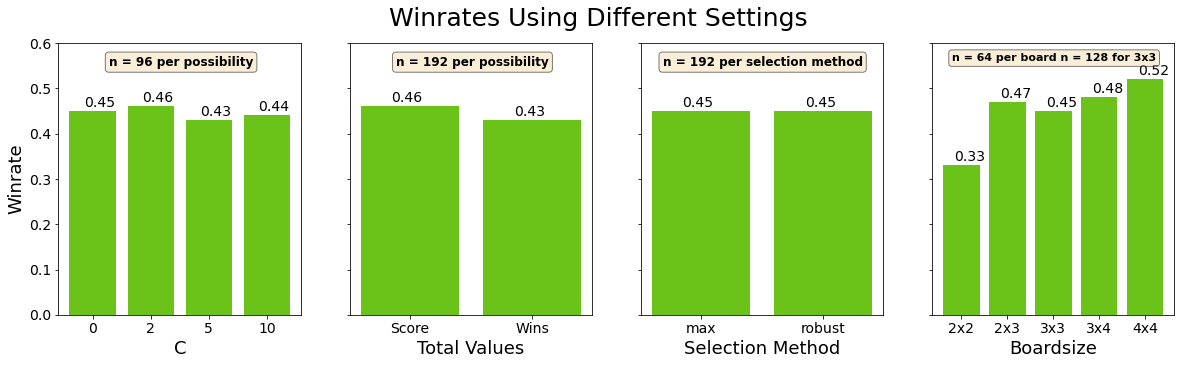

In [13]:
fig, axs = plt.subplots(1, 4, sharey = True, figsize=(20,5))
fig.suptitle("Winrates Using Different Settings", fontsize=25)

axs[0].bar(cx, cy, color = "#6BC319")
axs[0].set_xlabel("C", fontsize=18)
axs[0].set_ylabel("Winrate", fontsize=18)
axs[0].tick_params(axis="both", labelsize=14)

axs[0].set_ylim(top=0.6)

axs[1].bar(tox, toy, color = "#6BC319")
axs[1].set_xlabel("Total Values", fontsize=18)
axs[1].tick_params(axis="both", labelsize=14)

axs[2].bar(sex, sey, color = "#6BC319")
axs[2].set_xlabel("Selection Method", fontsize=18)
axs[2].tick_params(axis="both", labelsize=14)

axs[3].bar(six, siy, color = "#6BC319")
axs[3].set_xlabel("Boardsize", fontsize=18)
axs[3].tick_params(axis="both", labelsize=14)

for i in range(4):
    for p in axs[i].patches:
        axs[i].annotate(str(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01), fontsize=14)

box_style=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-18.55, 0.55, "n = 96 per possibility",{'color':'black','weight':'heavy','size':12},bbox=box_style)
plt.text(-12.3, 0.55, "n = 192 per possibility",{'color':'black','weight':'heavy','size':12},bbox=box_style)   
plt.text(-6.5, 0.55, "n = 192 per selection method",{'color':'black','weight':'heavy','size':12},bbox=box_style)   
plt.text(-0.2, 0.56, "n = 64 per board n = 128 for 3x3",{'color':'black','weight':'heavy','size':11},bbox=box_style)
 

plt.savefig(f"MC_tests\\MC_test_result.png")